<ipython-input-31-d2578e02f69a>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)# here we are filling the missing BMI values with median


Accuracy: 0.952054794520548
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       972
           1       1.00      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.98      0.51      0.51      1022
weighted avg       0.95      0.95      0.93      1022



<ipython-input-31-d2578e02f69a>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["stroke"], y=df["age"], palette="coolwarm")


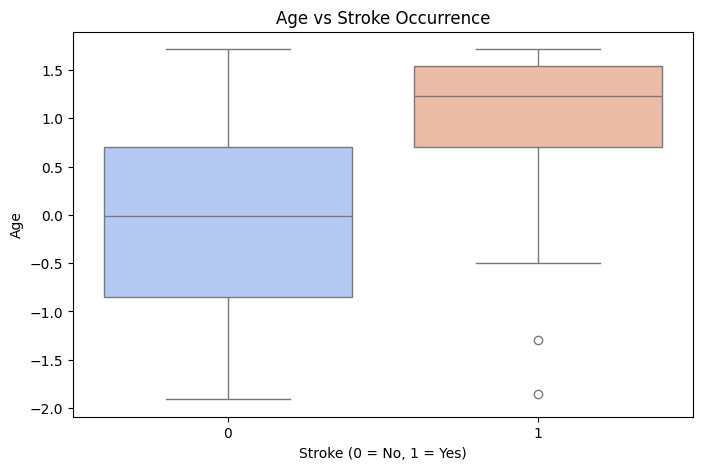

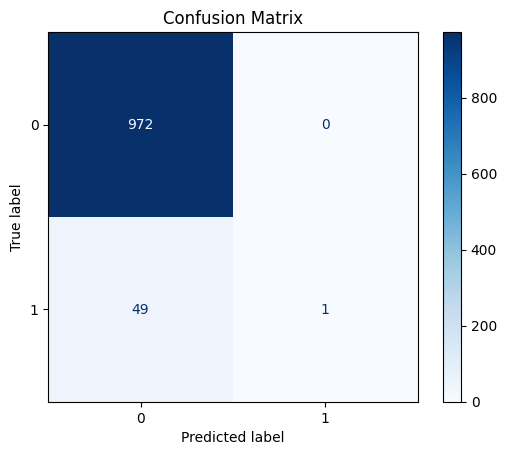

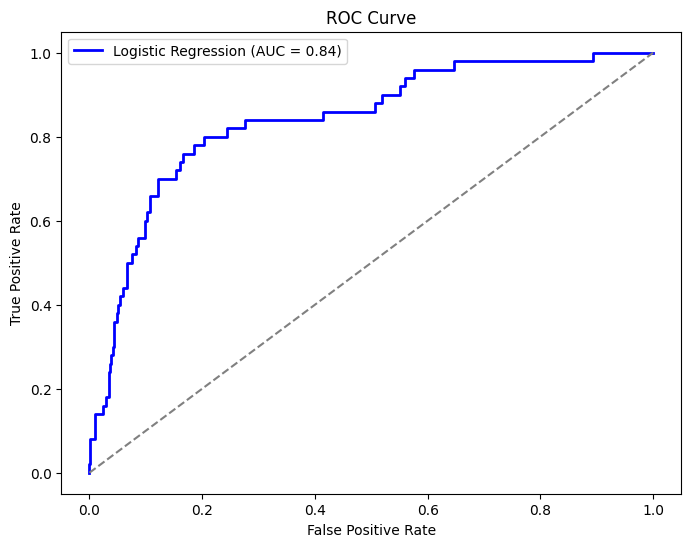

In [31]:
import pandas as pd
df = pd.read_csv("/content/stroke_prediction.csv")#loading the dataset

#print(df.head())

#print(df.info())

df.drop(columns=['id'], inplace=True)# here we drop 'id' column as it's not useful for prediction
#print(df)

df['bmi'].fillna(df['bmi'].median(), inplace=True)# here we are filling the missing BMI values with median
#print(df)

df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)# here we convert categorical columns using one-hot encoding
#print(df)
from sklearn.preprocessing import StandardScaler


num_cols = ['age', 'avg_glucose_level', 'bmi']# here we define numerical columns to scale
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
#print(df)
# now we define target variable (Y) and features (X)
X = df.drop(columns=['stroke'])  #  here all columns except 'stroke'
y = df['stroke']  # The target variable
from sklearn.model_selection import train_test_split

# now we split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
from sklearn.linear_model import LogisticRegression
# Now we start training the models
# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, classification_report

# now let us  make predictions using the best model (try Logistic Regression first)
y_pred = log_reg.predict(X_test)

# after that now we print accuracy & get the  classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
import joblib

# Save the best-performing model
joblib.dump(rf, "stroke_prediction_model.pkl")
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x=df["stroke"], y=df["age"], palette="coolwarm")
plt.title("Age vs Stroke Occurrence")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#  confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()
from sklearn.metrics import roc_curve, auc

# getting the predicted probabilities
y_pred_prob = log_reg.predict_proba(X_test)[:,1]

# Computing ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='grey', linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()